In [32]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski


In [15]:
np.choose?

/opt/anaconda/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


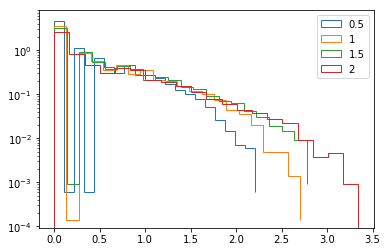

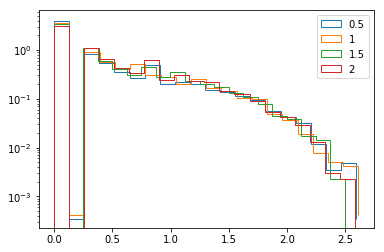

In [66]:
sub_arr_list = []
for xx in np.arange(16):
    a = np.floor(xx / 8)
    b = np.floor((xx - a*8) / 4)
    c = np.floor((xx - a*8 - b*4) / 2)
    d = xx - a*8 - b*4 - c*2
    sub_arr_list.append(np.array([[a, b], [c, d]]))

def gen_perc_arr(n=100, phi=0.5):
    arr = np.random.random((n,n)) > phi
    return arr

def gen_perc_diff_arr(n=200, phi=0.5, phi_d=1.1, emph=[3,5,10,12,7,11,13,14,15]):
    # Create arrays
    arr = np.random.random((n,n))
    arr_out = np.zeros((n*2,n*2))
    # Create CDF for sub array generation
    tot_p = 16 + (phi_d - 1)*len(emph)
    cutoffs = np.zeros(16)
    runsum = 0 
    for i in np.arange(16):
        if i in emph:
            runsum += phi_d / tot_p
        else:
            runsum += 1 / tot_p
        cutoffs[i] = runsum
#     print(cutoffs)
    # Populate out array with sub arrays
    ind_vec = np.arange(16)
    for i in np.arange(n):
        for j in np.arange(n):
            ind_choices = [xx for xx in ind_vec if arr[i,j] < cutoffs[xx]]
#             print(ind_choices, arr[i,j])
            sub_arr_ind = ind_choices[0]
            arr_out[2*i:(2*i+2),2*j:(2*j+2)] += sub_arr_list[sub_arr_ind]
    return arr_out

for phi_d in [0.5,1,1.5,2]:
    arr = gen_perc_diff_arr(phi_d=phi_d) > 0
    labeled = ski.measure.label(arr, connectivity=1)
    nlab = np.max(labeled)
    sizes = np.log10(np.array([np.sum(labeled == xx) for xx in np.arange(1,nlab+1)]))
    _ = plt.hist(sizes, log=True, normed=True, histtype='step',bins=20, label="{}".format(phi_d))
plt.legend()

plt.figure()

for phi_d in [0.5,1,1.5,2]:
    arr = gen_perc_diff_arr(phi_d=phi_d, emph=[3,5,10,12]) > 0
    labeled = ski.measure.label(arr, connectivity=1)
    nlab = np.max(labeled)
    sizes = np.log10(np.array([np.sum(labeled == xx) for xx in np.arange(1,nlab+1)]))
    _ = plt.hist(sizes, log=True, normed=True, histtype='step',bins=20, label="{}".format(phi_d))
plt.legend()
# plt.plot(np.linspace(0,3,5),np.power(10,np.linspace(1,-5,5)))
#     plt.imshow(labeled)
#     plt.title(np.max(labeled))


In [53]:
np.power(10,np.linspace(1,-6,5))
# for ii, sub_arr in enumerate(sub_arr_list):
#     plt.figure()
#     plt.imshow(sub_arr, vmin=0, vmax=1)
#     plt.title(ii)

array([1.00000000e+01, 1.77827941e-01, 3.16227766e-03, 5.62341325e-05,
       1.00000000e-06])

In [10]:
np.zeros(16)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])